# Predicting House Prices

Before I get into modeling, I want to start by looking through the data a bit.


In [21]:
import pandas as pd
import matplotlib as mp
%matplotlib inline

data_frame = pd.read_table("./housing.data", sep='\s+', header=None)
data_frame[0:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Unfortunately, unlike most datasets I've worked with, all I know for this set is which field is price (the last one, 13).  I'm not confident of what the others represent, so it's hard to hypothesize initially about which columns will be relevant. For this simple model I'll probably just include them all.  I do want to quickly visualize what the distribution of house prices (which I believe are in 10-thousands) looks like.

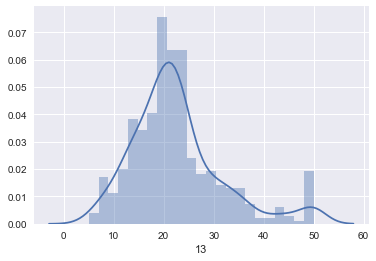

In [22]:
prices = data_frame[13]
import seaborn as sns
sns.distplot(prices)

At this point I considered centering and scaling the features in the dataset, but given this is really an exercise I'm using to better internalize the tensorflow interface, I'm going to give it a whirl and see how it performs without preprocessing.  Instead I'm going to go write to shuffling and splitting the data into a test set and a training set.

In [36]:
import sklearn.model_selection

data = data_frame.as_matrix()
train, test = sklearn.model_selection.train_test_split(data, test_size=0.1, train_size=0.9,random_state=2468)

print(len(train))
print(len(test))

455
51


In [47]:
# extract x and y features
price_column = 13
train_x = train[:,0:price_column]
train_y = train[:,[price_column]]
test_x = test[:,0:price_column]
test_y = test[:,[price_column]]